<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />


# Worksheet 6.0 Clustering - Answers

This worksheet covers concepts relating to Unsupervised Learning.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

There are many ways to accomplish the tasks that you are presented with, however you will find that by using the techniques covered in class, the exercises should be relatively simple. 

## Import the Libraries
For this exercise, we will be using:
* Pandas (https://pandas.pydata.org/pandas-docs/stable/)
* Numpy (https://docs.scipy.org/doc/numpy/reference/)
* Matplotlib (https://matplotlib.org/stable)


In [7]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
DATA_HOME = '../data'

# Clustering for Data Exploration
Let's try it on some real data and see what we can produce. As before the first step is to read in the data into a DataFrame.  

We will be using this data later, but the dataset consists of approximately 6000 domains--5000 of which were generated by various botnets and 1000 are from the Alexa 1 Million.  The columns are:

* `dsrc`:  The source of the domain
* `domain`:  The actual domain
* `length`:  The length of the domain
* `dicts`:  Percentage containing dictionary words
* `entropy`:  The entropy of the domain
* `numbers`:  The number of digits in the domain
* `ngram`:  Different n-grams which appear in the domain (?)

In [8]:
data = pd.read_csv(f'{DATA_HOME}/dga-full.csv')
data.sample(5)

,dsrc,domain,length,dicts,entropy,numbers,ngram
11181,cryptolocker,tseeuypghbisej,14,0.571429,3.324863,0,3.447933
8514,cryptolocker,lsbovgsempbshco,15,0.666667,3.323231,0,4.635484
41161,nivdort,roomsaturday,12,1.000000,3.084963,0,12.059670
22890,necurs,ppwsbbmixeqjwxkfsx,18,0.277778,3.461320,0,0.778151
44112,alexa,dot,3,1.000000,1.584963,0,0.602060


In [9]:
data['dsrc'].value_counts()

dsrc
cryptolocker    10000
gameoverdga     10000
necurs          10000
alexa           10000
nivdort          9978
bamital          2500
Name: count, dtype: int64

## Scaling the Data
Since clustering relies on measuring distances between objects it is important that all data points be on the same scale.  There are various methods for doing this, which are beyond the scope of this class, however, for this example, we will use scikit-learn's `StandardScaler` to accomplish this.  (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

The StandardScaler transforms each column by:
* Subtracting from the element in each row the mean for each feature (column) and then taking this value and
* Dividing by that feature's (column's) standard deviation.

Scikit-learn has a transformer interface which is very similar to the other scikit-learn interfaces.  The basic steps are:
1.  Create the Scaler object
2.  Using the feature matrix, call the `.fit()` method to "train" the Scaler
3.  Use the `.transform()` method to scale the data.

**NOTE**: When using a Scaler, it is important to train the scaler on your data, and use this trained scalers on any future predictions. 

In [10]:
feature_columns = ['length', 'dicts','entropy','numbers','ngram']
scaled_feature_columns = ['scaled_length', 'scaled_dicts','scaled_entropy','scaled_numbers','scaled_ngram']

In [11]:
#Step 1:  Create the scaler
scaler = StandardScaler()

#Steps 2 & 3:  Fit the scaler and transform this data
scaled_df = scaler.fit_transform(data[feature_columns])

#Put the scaled data into a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=scaled_feature_columns)

Take a look at the data and you'll see that the data is now all scaled consistently. 

In [12]:
scaled_df.sample(10)

,scaled_length,scaled_dicts,scaled_entropy,scaled_numbers,scaled_ngram
8632,-0.277145,0.087297,-0.356162,-0.498385,-0.699054
14515,1.560515,-0.993705,1.761319,1.400399,-0.371550
50266,0.379162,0.839298,0.082068,-0.498385,3.098927
4347,-0.145884,-0.426347,-0.088757,-0.498385,-0.653574
47446,-0.408407,0.915673,0.318839,-0.498385,2.022137
24483,-0.539668,0.644889,0.389797,-0.498385,-0.434267
6815,-0.408407,-1.604706,0.031342,-0.498385,-0.811719
20251,1.429253,-0.970205,1.468986,0.830764,-0.811719
21047,1.691776,-1.604706,0.973653,1.780156,-0.811719
47453,-0.539668,1.144799,-0.237469,-0.498385,1.537566


Finally for convenience, we're going to merge the scaled data with the non-scaled data.  

In [13]:
final_data = pd.merge( data, scaled_df, left_index=True, right_index=True)

In [14]:
final_data.sample(5)

,dsrc,domain,length,dicts,entropy,numbers,ngram,scaled_length,scaled_dicts,scaled_entropy,scaled_numbers,scaled_ngram
2841,cryptolocker,ujmkhgnvnfwv,12,0.25,3.251629,0,0.000000,-0.408407,-0.917330,0.031342,-0.498385,-0.811719
8876,cryptolocker,dxptmhbsivkm,12,0.50,3.418296,0,1.380211,-0.408407,-0.229954,0.318839,-0.498385,-0.553437
49605,alexa,ilovefreesoftware,17,1.00,3.263933,0,26.643746,0.247900,1.144799,0.052567,-0.498385,4.174187
17495,gameoverdga,3z6dxo1iulr6413wd4zm1yo30sh,27,0.00,4.032303,11,0.000000,1.560515,-1.604706,1.377990,1.590278,-0.811719
46001,alexa,pantherainteractive,19,1.00,3.181366,0,38.174774,0.510423,1.144799,-0.089860,-0.498385,6.332014


### Your Turn!
Now that we have data that is suitable (maybe) for clustering, in the section below, perform K-Means clustering on this data set.  Initially, start out with 2 clusters and assign the `cluster id` as a column in your DataFrame.

Then do a `value_counts()` on the `dsrc` column for each cluster to see how the model divided the data.  Try various values for `k` to see how it performed.

Remember to use the **scaled features** for your clustering.  

In [15]:
kmeans = KMeans(n_clusters=6, n_init=2).fit(final_data[scaled_feature_columns])

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 1.41889771 -1.12015978  1.37549261  1.12447031 -0.61353029]
 [-1.17805708 -0.11586992 -1.74630417 -0.44035665 -0.56523756]
 [-0.18907851  1.0901716  -0.116556   -0.49262158  3.07858264]
 [-0.10979659 -0.24333485  0.1939282  -0.49671041 -0.46082942]
 [-0.78809691  1.08692624 -0.70204545 -0.49416898  0.70411681]
 [ 2.19589568 -1.37946486  0.66101107  3.26611297 -0.71389355]]
[5 5 5 ... 2 1 2]


In [16]:
final_data['dsrc'].value_counts()

dsrc
cryptolocker    10000
gameoverdga     10000
necurs          10000
alexa           10000
nivdort          9978
bamital          2500
Name: count, dtype: int64

In [17]:
final_data['cluster_id'] = kmeans.labels_

In [18]:
final_data['cluster_id'].value_counts()

cluster_id
3    17694
4    15412
0     9912
1     4393
5     2578
2     2489
Name: count, dtype: int64

In [19]:
final_data[final_data['cluster_id'] ==5]['dsrc'].value_counts()

dsrc
bamital        2496
gameoverdga      81
alexa             1
Name: count, dtype: int64

In [20]:
final_data['domain'][(final_data['cluster_id'] == 0)].sample(20)

16815      1im1dg7o8dlrura1fo115ftmnq
12753       pwf2zr170mhvnralq0763u9rj
17690      usinuy1wsx4cn1pqut4dp5lrfq
22327       3c5ukutxvq8l1yruxydii7fmv
15079      j0x52ai90dq51nk3k7f1ova4l8
16836      q1co0r1tkkqch14xbfeq4szeh4
16501      d9t4801lh14eu1jehuh0qibsnz
15380       iyzocx19rmh5mvqlqvxmndt4y
17110    1vgvn6y1alqo111ihje5n1cvh05l
22039     7r4yjo1ntvm2r1fm1v4n1vfo1gu
13412       1l9r8iirc72v7n1gdsl7j9mwd
18442      16lxviclhlb42d7r2kq168ph2g
15248       17aspnhegsppx3ijd54ptibr9
21652      1polo0zbtpeiiochrv61t6h5bn
16475      18qi6f1j66za01j5onw46dbs46
14461      dzepuxopqlms1ftz7wt1r8eb6k
17762       x8jco3xsksm4gguqgb1wflggw
13890      au9dotx8u67r1gkoiqh1hujmat
19386      ymg0gz1m78mt41e3ex32tlfbt6
18779    12bmfkd1djskaj16s7oc21kl4shx
Name: domain, dtype: object

In [21]:
final_data[final_data['cluster_id'] == 0]['domain'].sample(15)

18610       pthc4u1x2in81usrwm2zrgpe0
18017     11rn4e01n9m891fzeyr01p92nr3
21648      2s8fsm26ce1n11me5ud1mzv97v
19443       ldes6f1yuistqfk98za1qgwe2
16269     1y8y1nq1wjjv1nak9b9u1hxrfie
20507     19gyn7gnyo6zv1ti7cte1f9dq29
20940      1kus46viqzeu21ikredrjclyl1
16749        6wwcp7gw8hjw55wli25owyci
22302        mpe3nnefzifzg2ugqemun81v
21529    176vv5m1fs0wl610lv06m1vhahto
19666        s4rt1yacpbkxsp3gky8rte2x
17875    1ej9fb517fgwey175g43o16i3sj5
14789    160zqag151f0n017quf5x1p7fmaa
14172    1yegd0f1t0ca8l1z0htzj12lg573
12514      el2yq7sfnzy71g6qxjd1f4vbty
Name: domain, dtype: object

In [22]:
final_data['domain'][final_data['dsrc'] == 'cryptolocker'].sample(5)

11952      ovrjqqkmatqdg
6914        npnpqibnroxt
11291     dgyyipndaevjjr
7157     oiynjwqgjqlmnee
7389      rvkynynwluyuhx
Name: domain, dtype: object

In [23]:
final_data[final_data['dsrc'] == "bamital"]['domain'].sample(10)

2068    ca173c5f03bdd3e8cb6d15dea0bab17d
1068    6cae42480844dbcad8fd6449c6dd7f03
1238    39925c1ffa64c62ae70c4204e4bddc60
2201    e45ca608adbba6571430fb8322aaf0c2
1360    c4d76e7d5809fbaee682c8108d888ffd
1826    eaaa7c9e11a8671989b10265f03f21a7
1830    82b7390e8ee2c0752ad68ba233d5e2e5
236     b317346d98095181e5aa8fbb2bfb5c3e
1196    657d4a84b702c94cc8b7bf57b2683233
1159    c9257c03804f2a0fe77689e0750241b3
Name: domain, dtype: object

In [24]:
final_data[final_data['dsrc'] == "nivdort"]['domain'].sample(10)

34410      fairfine
38290     takengrow
33353      spotiron
38586     southboat
33297    gladweight
41311      hillfire
35057    wronghello
42453     gladshade
40199      pickthey
40147      moveheat
Name: domain, dtype: object

In [25]:
final_data[(final_data['cluster_id'] == 1) & (final_data['dsrc'] == 'necurs')]['domain']

22501       iwxdakv
22519    dfvpffkfqw
22522       puinmfq
22523    ltljsrvrrj
22535       psxfonx
            ...    
32488      rieqtwxe
32489       vwvfafh
32492       mrvlfbv
32493      nutsifvs
32499       vpvlyut
Name: domain, Length: 1426, dtype: object

## Food for thought:
Now that you've done clustering with various numbers of clusters, it appears that the data acutally does break evenly into 2 clusters.  Take a look at the original data and see if you can come up with a reason why that is the case.

## Visualizing Performance
As we already know, it is difficult to measure the performance of clustering models since there usually is no known ground truth from which to evaluate your model.  However, there are two techniques which 

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion_score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette_score, the mean silhouette coefficient for all samples or the calinski_harabaz_score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for K. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point. (http://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

In python there is a module called `YellowBrick` which facilitates visualizing the K-Elbow score.  All of YellowBrick's visualizations follow essentually the same pattern:

1.  Create the Visualizer Object
2.  Call the `.fit()` method using the data
3.  Call the `.show()` method to render the visualization

The snippet below demonstrates how to use the elbow method to visualize the clustering model's performance on this dataset.
```python
visualizer = KElbowVisualizer(KMeans(), k=(4,12))

visualizer.fit( feature_matrix ) 
visualizer.show()
```

### Your Turn!
In the box below, create a visualization using the elbow method to see if there are any inflection points in the distortion score.

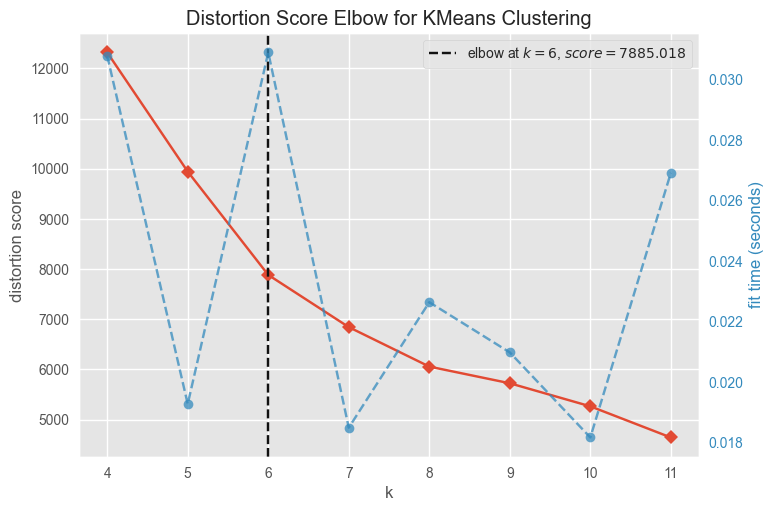

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Your code here...
visualizer = KElbowVisualizer(KMeans(n_init=2), k=(4,12), metric='distortion')

visualizer.fit(final_data[scaled_feature_columns].sample(10000))
visualizer.show()

## Another Way to Visualize Clustering Performance
The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering. (http://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)


### Your Turn!
Using the YellowBrick `SilhouetteVisualizer`, try visualizing models with various values of `K`.

**Note**:  This visualization is quite expensive, so I recommend performing this using a sample o your original data.

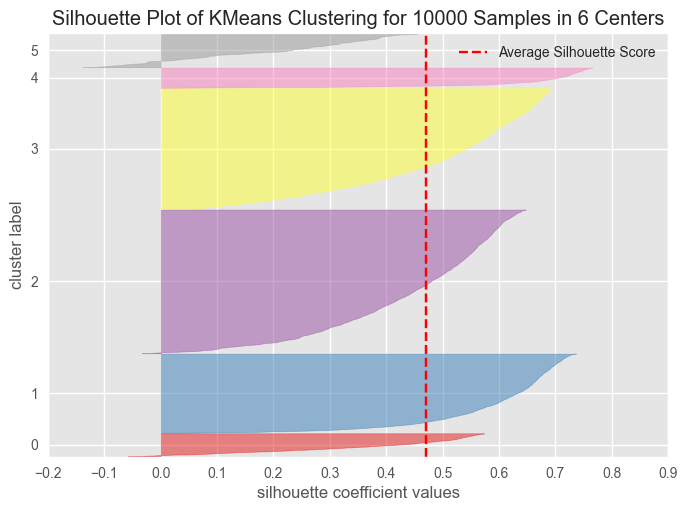

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
# Your code here...
visualizer = SilhouetteVisualizer( KMeans(n_clusters=6, n_init=3))

visualizer.fit(final_data[scaled_feature_columns].sample(10000))
visualizer.show()

## Anomaly Detection using Clustering methods
Let's use a hierarchical clustering method to detect anomalies in a set of data points. The one we will use is called (agglomerative clustering)[https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html]. 

First we will create a dataset that only has 20 DGA rows and 1000 legit samples. Thus, there are 20 anomalies in this dataset that we know of. Then we will see if our clustering method can detect them. 

In [43]:
dga_data = pd.read_csv(f'{DATA_HOME}/dga_features_final_df_domain.csv')
print(dga_data.isDGA.value_counts())

isDGA
1    1000
0    1000
Name: count, dtype: int64


In [44]:
is_dga = dga_data[dga_data['isDGA']==1].sample(10)
not_dga = dga_data[dga_data['isDGA']==0]

In [45]:
print(len(is_dga))
print(len(not_dga))

10
1000


In [46]:
dga_anomaly_data = pd.concat([is_dga, not_dga])
dga_anomaly_data['isDGA'].value_counts()

isDGA
0    1000
1      10
Name: count, dtype: int64

In [47]:
dga_anomaly_data_domain = dga_anomaly_data
dga_anomaly_data = dga_anomaly_data.drop('domain',axis=1)

#### Now use this dataset in clustering

First we want to scale the data because it is clustering which means that distance is important and that is extremely sensitive to different scales. Use either the Standard Scaler or Min Max Scaler from sklearn to scale our data set.

In [48]:
dga_anomaly_data  = StandardScaler().fit_transform(dga_anomaly_data)

Now that we have prepared the data, we can put it into a model. Call the Agglomerative Clustering model from sklearn and fit it to the data. name the model **agglomerative_clust**

In [49]:
agglomerative_clust = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglomerative_clust = agglomerative_clust.fit(dga_anomaly_data)

# pull out the label of the cluster each point belongs to. 
labels_for_clusters = agglomerative_clust.labels_

This plot_dendrogram function will plot the dendrogram for the cluster model you just fitted to the data. 

In [50]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Use the plot_dendrogram function to plot the dendrogram. You an get lower and lower levels if you increase the value of **p**. Try plotting a few values of **p** to see the difference and notice what happens.

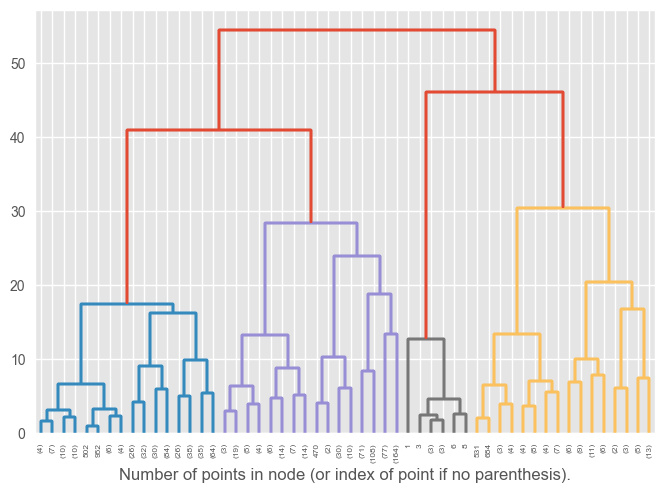

In [42]:
plot_dendrogram(agglomerative_clust, truncate_mode="level", p=5);
plt.xlabel("Number of points in node (or index of point if no parenthesis).");
plt.show()


Notice that in the plot there are some digits on the x-axis with no parenthesis. These are nodes that did not have more than 1 data point. We want to take a look at these because they are 'far' enough away from the rest of the data to warrant their own node, and thus could be an anomaly. 

Below, use the original pandas data frame to print the rows of the single nodes and see if these are our few DGAs. 

In [51]:
dga_anomaly_data_domain.iloc[0,:]

isDGA                                      1
domain             uzrwiswxkgpfyxn52i1ukrkhm
length                                    25
digits                                     3
entropy                             4.053661
vowel-cons                          0.222222
firstDigitIndex                           16
ngrams                            639.626377
Name: 74, dtype: object

In [52]:
dga_anomaly_data_domain.iloc[3,:]

isDGA                            1
domain             wyaecynekmopcef
length                          15
digits                           0
entropy                   3.323231
vowel-cons                     0.5
firstDigitIndex                  0
ngrams                 1182.164225
Name: 479, dtype: object

In [53]:
dga_anomaly_data_domain.iloc[5,:]

isDGA                                             1
domain             021194bbaf31cd3ed38d77eb45450f54
length                                           32
digits                                           20
entropy                                    3.757049
vowel-cons                                 0.333333
firstDigitIndex                                   1
ngrams                                   389.541331
Name: 461, dtype: object

In [54]:
dga_anomaly_data_domain.iloc[29,:]

isDGA                         0
domain             skidrowgames
length                       12
digits                        0
entropy                3.418296
vowel-cons                  0.5
firstDigitIndex               0
ngrams               1337.05303
Name: 1019, dtype: object

Another thing to note is just to look at the contents of the smallest cluster (depending on how small you think your anomalies are. IN this case our smallest cluster contains the DGAs. Thus, our model accurately pulled out the DGAs into their own 'anomaly' cluster. 

## DBSCAN
Another clustering method we can try is DBSCAN (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  Remember that the main tuning parameters for DBSCAN are:

* **epsilon (eps)**:  The minimum distance between two samples 
* **min_samples**:  The minimum number of samples needed to form a neighborhood

By default epsilon is 0.5 and the min_samples is 5. First, try DBSCAN with the default options.  If you use the `fit_predict()` function, you can save the results in a new column in your data.  

How did this compare with K-Means?  Given that you actually know what the data really is, how did DBSCAN do in terms of identifing meaningful clusters?  Look at the `dsrc` column and do `value_counts()` for the various neighhborhoods.  What did you notice?

Try again, but this time experiment with the values of epsilon and min_samples and see what DBSCAN comes up with. 

In [55]:
dbscan = DBSCAN(min_samples=5, n_jobs=4)

In [56]:
final_data['dbs_default'] = dbscan.fit_predict(final_data[scaled_feature_columns])

In [57]:
final_data['dbs_default'].value_counts()

dbs_default
 1    49777
 0     2501
 4      119
-1       50
 3       23
 2        8
Name: count, dtype: int64

In [58]:
final_data[final_data['dbs_default'] == 0 ]['dsrc'].value_counts()

dsrc
bamital    2500
alexa         1
Name: count, dtype: int64

In [59]:
final_data[final_data['dbs_default'] == 0][['dsrc','domain']].sample(10)

,dsrc,domain
1735,bamital,4b4808620828c90e39dff60b243ce735
1783,bamital,fea8506c8e37fb237ae5b58d89ae7f56
66,bamital,31ef0241db237aeb5a3005186e6b0e7f
305,bamital,7025fad58c768adaed1511a75940a205
1315,bamital,3e86de64f9c04c7bf0cf82629c17ca40
1814,bamital,f62de4bceccf4136854ee39534a4c8d0
1676,bamital,ce9eec8eebde9d479381a1e0839d4514
1118,bamital,cbb796d0df104b56ddcdfb3f1d27e537
272,bamital,84c9f04d6122741f8ae0ae6b9c59f912
1649,bamital,a8f7f3780b78d0c8f9e16c1b50384ccc


In [60]:
final_data[final_data['dbs_default'] == -1 ]['dsrc'].sample(10)

49131     alexa
48102     alexa
50159     alexa
26731    necurs
50694     alexa
50773     alexa
51347     alexa
32203    necurs
43531     alexa
45756     alexa
Name: dsrc, dtype: object

In [61]:
final_data['domain'][final_data['dsrc'] == "nivdort"].sample(5)

34383    spotimportant
36240        sightcity
33604       whichenjoy
41626        grouplift
40882        wifefruit
Name: domain, dtype: object

In [62]:
final_data[final_data['dbs_default'] == 2 ]['dsrc'].value_counts()

dsrc
alexa    8
Name: count, dtype: int64

In [63]:
final_data[final_data['dbs_default'] == 1 ]['dsrc'].value_counts()

dsrc
cryptolocker    10000
necurs           9998
gameoverdga      9996
nivdort          9978
alexa            9805
Name: count, dtype: int64

In [64]:
final_data[final_data['dsrc'] == "cryptolocker"]['domain'].sample(10)

7758       eyosyqrphyjyq
6747       ljxvelqimjfmy
2606       qbkxkrnwvolxl
12257     twnpiabhkecmae
10629       muvtvdascvei
3124     pfcqilykgxodafq
3767       gqeyxnconopua
5062     vlvpsrlmomyoerk
8715       cudhtsbutekfb
8284     cnwyxppxyfgpthn
Name: domain, dtype: object

In [65]:
final_data[final_data['dsrc'] == "necurs"]['domain'].sample(10)

23965          uwnlhpsspcs
28963    jjvgceysljhltnfgj
26814     mmsbbhfocoeqwflg
27928         ndqeyfubkxqb
31829         wtvgdjgnjahm
32276      jgdedcjaqygdcjx
31565         pnvdrxfmlium
27492      tpsjlirhnqkxbkh
24786       btnlpfokuufieb
28906              wveitnb
Name: domain, dtype: object